In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import gaussian_filter

In [8]:
a = Image.open('./imgs/heart.png').convert('RGB') # 画像を読み込み
b = Image.open('./imgs/star.png').convert('RGB') # 画像を読み込み
a = (255 - np.array(a)).astype(np.float64).mean(2) # 二次元行列に変換
b = (255 - np.array(b)).astype(np.float64).mean(2) # 二次元行列に変換
a = a / a.sum() # 確率ヒストグラム（総和 1）に変換
b = b / b.sum() # 確率ヒストグラム（総和 1）に変換

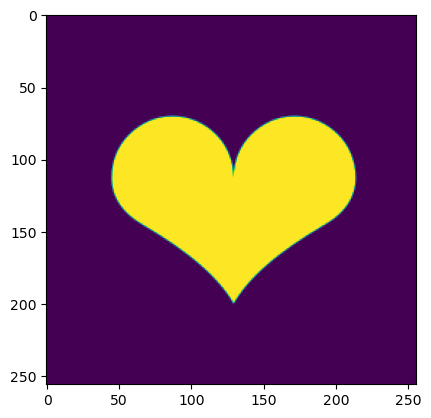

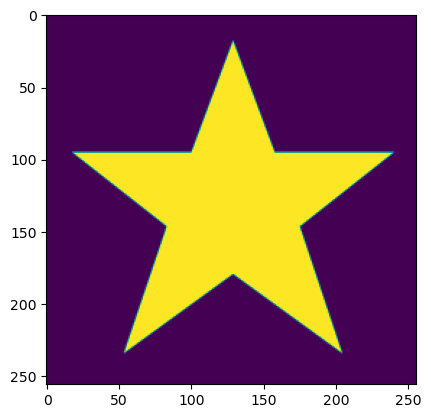

In [9]:
plt.imshow(a)
plt.show()
plt.clf()
plt.imshow(b)
plt.show()

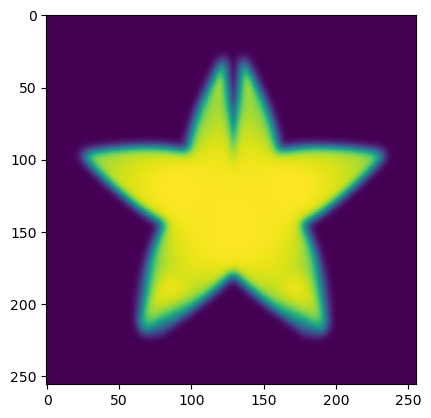

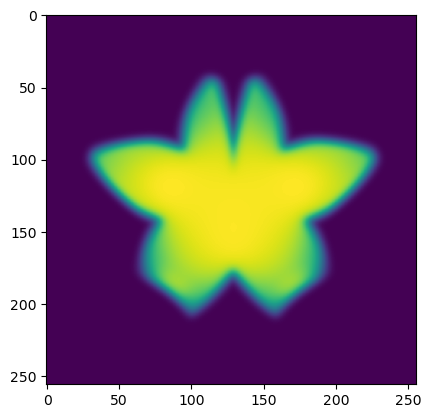

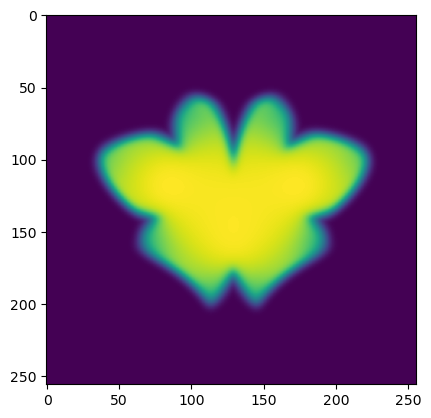

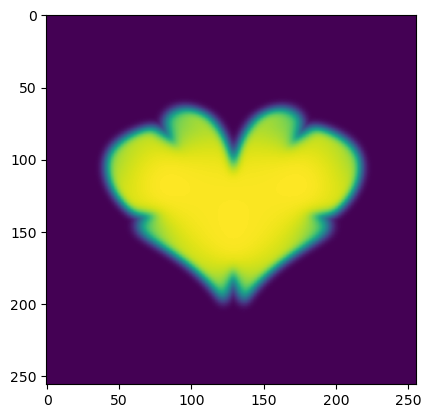

In [10]:
# アルゴリズム 8.3
eps = 3
truncate = 16.0
meps = 1e-32
for i, lam in enumerate([0.2, 0.4, 0.6, 0.8]):
    u1 = np.ones(a.shape)
    u2 = np.ones(a.shape)
    
    for _ in range(100):
        v1 = a / (gaussian_filter(u1, eps, truncate=truncate) + meps)
        v2 = b / (gaussian_filter(u2, eps, truncate=truncate) + meps)
        vagg = (gaussian_filter(v1, eps, truncate=truncate) ** lam) * (gaussian_filter(v2, eps, truncate=truncate) ** (1 - lam))
        u1 = vagg / (gaussian_filter(v1, eps, truncate=truncate) + meps)
        u2 = vagg / (gaussian_filter(v2, eps, truncate=truncate) + meps)
    vagg /= vagg.max()
    plt.clf()
    plt.imshow(vagg)
    plt.show()
    img = Image.fromarray((255 * (1 - vagg)).astype(np.uint8))
    img.save('./imgs/star_heart_{}.png'.format(i))

In [11]:
a = Image.open('./imgs/twostar.png').convert('RGB') # 画像を読み込み
b = Image.open('./imgs/yusou.png').convert('RGB') # 画像を読み込み
a = (255 - np.array(a)).astype(np.float64).mean(2) # 二次元行列に変換
b = (255 - np.array(b)).astype(np.float64).mean(2) # 二次元行列に変換
a = a / a.sum() # 確率ヒストグラム（総和 1）に変換
b = b / b.sum() # 確率ヒストグラム（総和 1）に変換

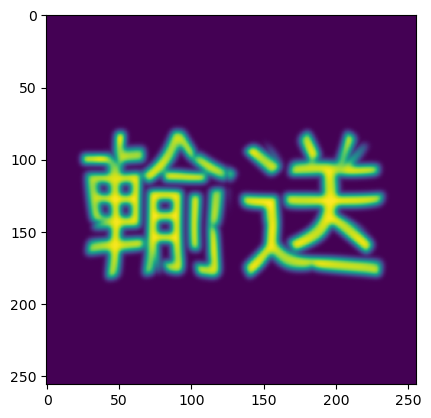

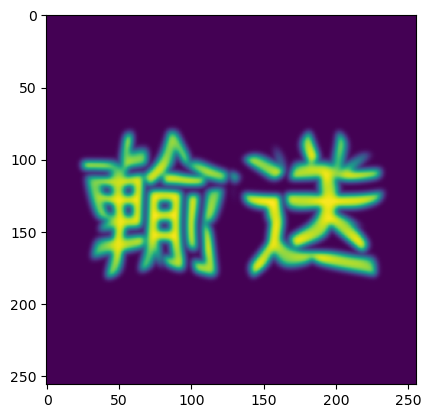

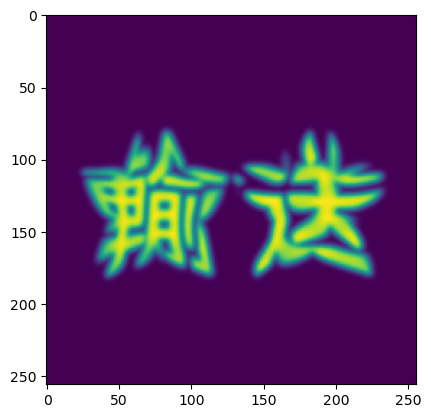

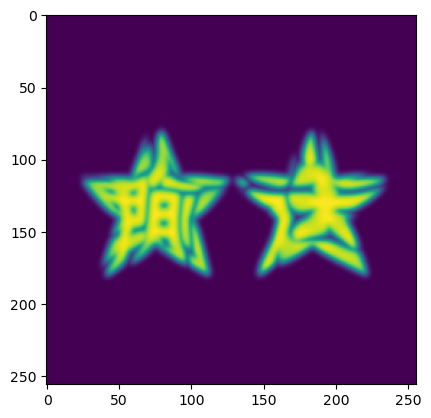

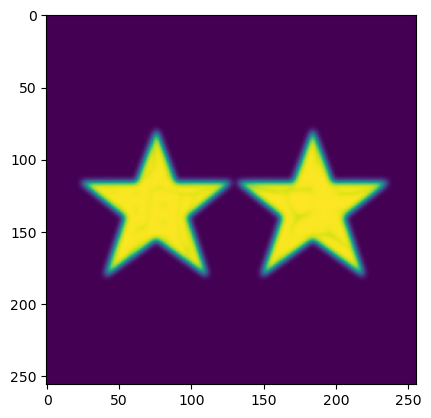

In [12]:
# アルゴリズム 8.3
eps = 2
truncate = 16.0
meps = 1e-32
for i, lam in enumerate([0.2, 0.4, 0.6, 0.8,0.99]):
    u1 = np.ones(a.shape)
    u2 = np.ones(a.shape)
    
    for _ in range(100):
        v1 = a / (gaussian_filter(u1, eps, truncate=truncate) + meps)
        v2 = b / (gaussian_filter(u2, eps, truncate=truncate) + meps)
        vagg = (gaussian_filter(v1, eps, truncate=truncate) ** lam) * (gaussian_filter(v2, eps, truncate=truncate) ** (1 - lam))
        u1 = vagg / (gaussian_filter(v1, eps, truncate=truncate) + meps)
        u2 = vagg / (gaussian_filter(v2, eps, truncate=truncate) + meps)
    vagg /= vagg.max()
    plt.clf()
    plt.imshow(vagg)
    plt.show()
    img = Image.fromarray((255 * (1 - vagg)).astype(np.uint8))
    img.save('./imgs/yusou_star_{}.png'.format(i))